In [ ]:
Project Title: "Design and Deployment of an AI-Powered Predictive  System" 

Project Category: Healthcare
HEART DISEASE PREDICTION APP

Developed by:
OLUWAYEMI DORCAS ODEJOBI

Submitted to Incubator Hub Africa
In partial fulfillment of the requirement for the award of AI/ML Engineering 

In [ ]:
PHASE 1: Dataset & Problem Definition 

In [ ]:
Overview:
Heart disease (also known as Cardiovascular disease) is a condition that affects the heart and blood vessels. The most common types include 
coronary heart disease, arrhythmias, heart attack, stroke and other conditions. They are the leading cause of death globally.  
An estimated 47% of adults are unaware that they have the condition as heart disease may be silent until a person experiences symptoms of 
heart attack or heart failure.. Most heart diseases are usually caused by behavioral and environmental risk factors such as unhealthy diet, 
physical inactivity, tobacco use and harmful use of alcohol which may show up in individuals as elevated blood pressure, blood sugar and lipids 
and obesity.

In [ ]:
Problem Statement:
Lack of insight is a likely contributor to complications, emergency admissions in hospitals and sudden deaths associated with heart disease. 
An improved understanding of the disease and awareness of risk factors are needed to guide relevant preventative measures, early detection and 
timely medical intervention. Therefore, this project aims to develop a machine learning model that can accurately predict whether an individual 
is likely to have heart disease based on a variety of demographic, lifestyle, and medical factors.

In [ ]:
The heart disease dataset was downloaded from kaggle and it provides comprehensive medical data related to cardiovascular conditions. 
It contains various attributes that can help predict heart disease in individuals, with 1190 instances and 11 features. 
It was a combined dataset from five different sources, namely;
Cleveland
Hungarian
Switzerland
Long Beach VA
Statlog (Heart) Data Set

Column attributes include the following;
> age (Age of the patient in years)
> sex (Male= 1, Female= 2)
> chest pain type (typical angina=1, atypical angina=2, non-anginal=3, asymptomatic=4)
> resting bp s (resting blood pressure in mmHg)
> cholesterol (in mg/dl)
> fbs (if fasting blood sugar > 120 mg/dl---True=1, False=0)
> resting ecg: resting electrocardiographic results (Normal=0, ST-T wave abnormality=1, Left ventricular hypertrophy=2)
> max heart rate (maximum heart rate achieved) 71 - 202
> exercise-induced angina (Yes=1, No=2)
> oldpeak: depression
> ST slope: the slope of the peak exercise ST segment (Upsloping=1, Flat=2, Downsloping=3)
> target (Normal=0, Heart disease=1)

In [96]:
# Import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
# Load the Dataset
df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")   #Read the csv file into a dataframe

df.head()    # View the first five rows

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [98]:
df.tail()    # View the last five rows

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [99]:
df.shape   # To see the number of features and instances

(1190, 12)

In [100]:
df.columns   # To see the column names

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [101]:
df.info()   # To understand the structure of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [102]:
df.describe()   # Summary statistics for the numeric columns (Mean, Std, Min value, Percentiles, Max value)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
PHASE 2: Data Preparation 

In [103]:
df.isnull().sum()  # Detect missing values

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [104]:
df[df.duplicated()]   # To find duplicate in the rows

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
163,49,0,2,110,208,0,0,160,0,0.0,1,0
604,58,1,3,150,219,0,1,118,1,0.0,2,1
887,63,1,1,145,233,1,2,150,0,2.3,3,0
888,67,1,4,160,286,0,2,108,1,1.5,2,1
889,67,1,4,120,229,0,2,129,1,2.6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,42,1,3,130,180,0,0,150,0,0.0,1,0
1157,61,1,4,140,207,0,2,138,1,1.9,1,1
1158,66,1,4,160,228,0,2,138,0,2.3,1,0
1159,46,1,4,140,311,0,0,120,1,1.8,2,1


In [105]:
df.duplicated().sum()   # Count the total number of duplicate rows

272

In [106]:
df.drop_duplicates(inplace=True)   # To remove duplicates

In [ ]:
There were 272 duplicates found in the dataset, which were removed because it included the target variable which may bias my model. 
It remains 918 instances 12 features

In [107]:
df.shape   # To see the number of features and instances after removing duplicates

(918, 12)

In [108]:
df.duplicated().sum()   # Count the total number of duplicate rows afterwards 

0

In [109]:
df.info()   # To recheck the structure of the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  918 non-null    int64  
 1   sex                  918 non-null    int64  
 2   chest pain type      918 non-null    int64  
 3   resting bp s         918 non-null    int64  
 4   cholesterol          918 non-null    int64  
 5   fasting blood sugar  918 non-null    int64  
 6   resting ecg          918 non-null    int64  
 7   max heart rate       918 non-null    int64  
 8   exercise angina      918 non-null    int64  
 9   oldpeak              918 non-null    float64
 10  ST slope             918 non-null    int64  
 11  target               918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 93.2 KB


In [110]:
print(df['target'].value_counts())   # Total number of patients with heart disease and those that do not have

target
1    508
0    410
Name: count, dtype: int64


In [111]:
print(df['fasting blood sugar'].value_counts())   # Total number of patients with FBS >120mg/dL (Diabetes) Vs those with <120mg/dL (Non-diabetic)

fasting blood sugar
0    704
1    214
Name: count, dtype: int64


In [112]:
# Exploratory Data Analysis: This is the process of visualizing the distribution of features and also understand the structure of the dataset.

In [26]:
# Import the necessary libraries

import seaborn as sns
import matplotlib.pyplot as plt 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12524\2993577668.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




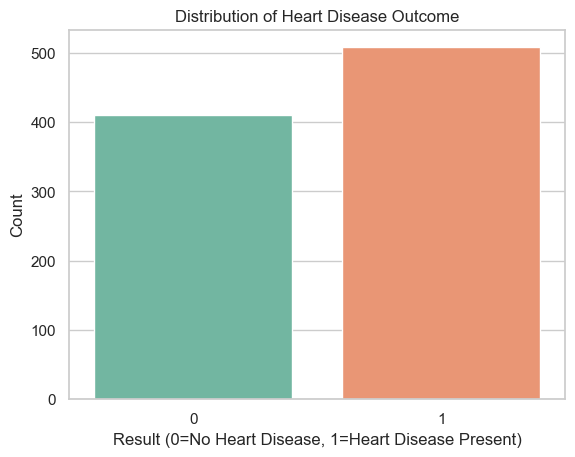

In [113]:
# Countplots to visualize class distribution 

sns.countplot(x='target', data=df, palette='Set2')  # Creates a bar chart showing the counts of unique values in the 'target' column
plt.title('Distribution of Heart Disease Outcome')    # Adds a title to the plot.
plt.xlabel('Result (0=No Heart Disease, 1=Heart Disease Present)')   # Labels the x-axis to indicate what 0 and 1 represent.
plt.ylabel('Count')   # Labels the y-axis as count.
plt.show()    #  Displays the plot

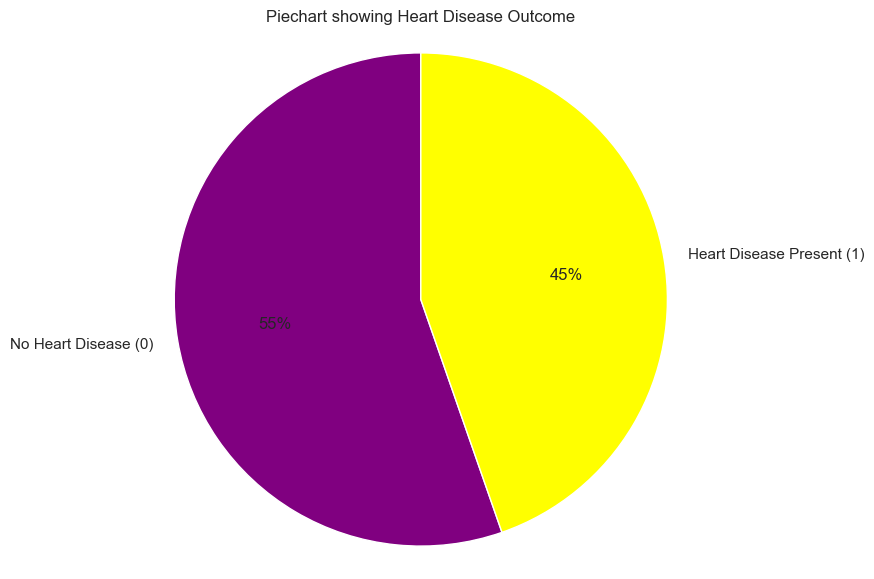

In [114]:
# Representation of Heart Disease Column using Piechart 
outcome_counts = df['target'].value_counts()   # Calculate the distribution of 'Heart Disease' column

plt.figure(figsize=(7, 7))   # Plot a pie chart
plt.pie(outcome_counts, labels=['No Heart Disease (0)', 'Heart Disease Present (1)'], autopct='%1.f%%', startangle=90, colors=['purple', 'yellow'])
plt.title('Piechart showing Heart Disease Outcome')   # Add a title
plt.axis('equal')  # Ensures the pie is a circle
plt.show()

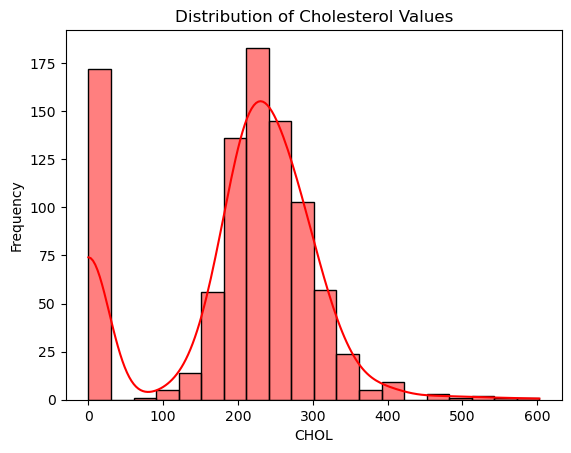

In [29]:
import seaborn as sns   # Import the libraries
import matplotlib.pyplot as plt

sns.histplot(df['cholesterol'], kde=True, color='red', bins=20)   # Create a histogram for the 'Cholesterol' column
plt.title('Distribution of Cholesterol Values')   # Add a title and labels
plt.xlabel('CHOL')
plt.ylabel('Frequency')

plt.show()   # Show the plot

In [ ]:
Distribution of Cholesterol Values

- X-axis (CHOL): Cholesterol values in mg/dL)

- Y-axis (Frequency): Number of patients or entries with those cholesterol levels

1. The histogram has two prominent peaks (bimodal distribution): One peak is around 0–50 mg/dL (suspiciously low) and another peak is around 200–250 mg/dL

This suggests that:

Some data points have very low cholesterol values (likely errors or missing data encoded as 0).

The majority fall within a normal-to-high range, which is expected in a medical dataset.

2. KDE Line (Red Curve)
The red smooth curve is a Kernel Density Estimate (KDE), which helps visualize the probability distribution of the data. The KDE mirrors the 
two modes seen in the bars: A sharp spike near zero which could indicate missing values recorded as 0 or outliers that need cleaning

                            A broader and higher bump around 200–250

🔍 Investigate values below 100 mg/dL (especially near 0). In a real-world scenario, cholesterol values below 100 mg/dL are rare and potentially 
suspicious.

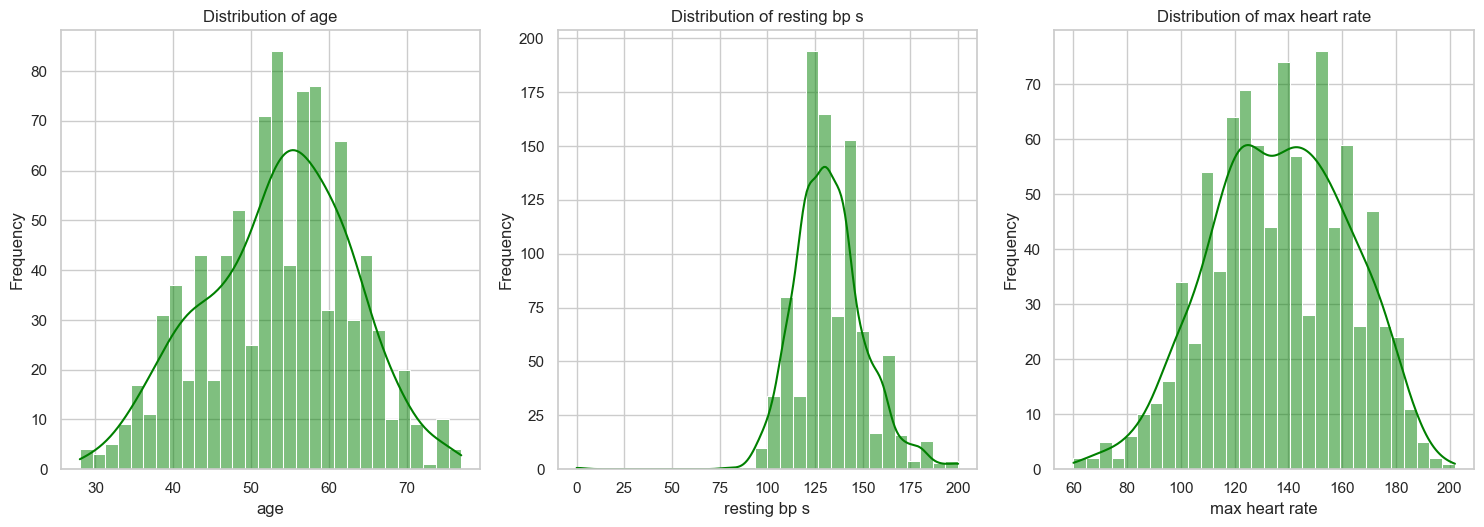

In [115]:
# Histograms to visualize key features

sns.set(style="whitegrid")   # Set a consistent style
features = ['age', 'resting bp s', 'max heart rate']   # Define columns to plot

plt.figure(figsize=(15, 10))   # Plot histograms
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True, bins=30, color='green')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
Histogram Interpretation
1. Distribution of age: It appears normally distributed 

2. Distribution of resting blood pressure: It is right-skewed, most of the data is concentrated on the left which is normal but there is a 
   noticeable count at 0, indicating a missing data or not measured.

3. Distribution of maximum heart rate: The distribution appears normal

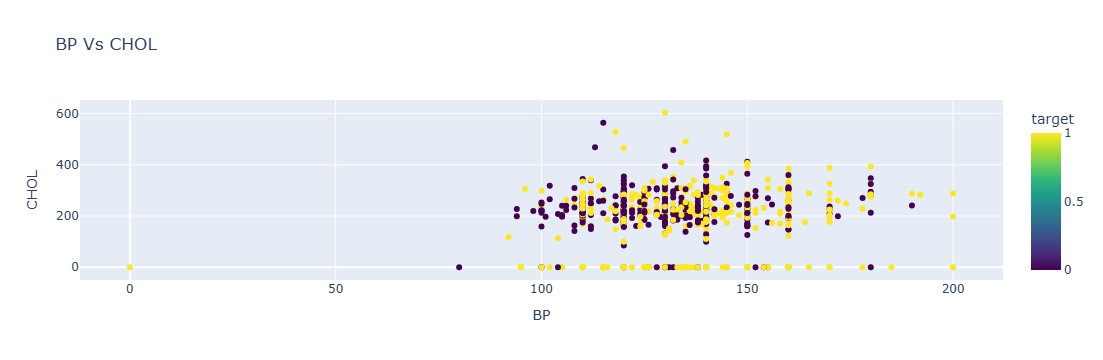

In [116]:
# Scatter plot for 'Cholesterol' vs. 'Blood Sugar'
import plotly.express as px   # Import the library

fig = px.scatter(df, x='resting bp s', y='cholesterol', title='BP Vs CHOL',   # Features to analyze
                 labels={'resting bp s': 'BP', 'cholesterol': 'CHOL'},
                 color='target', color_continuous_scale='Viridis')

fig.show()   # Show the plot

In [ ]:
Scatter plot Interpretation:
Some values show up in the 'normal range' region of the plot, that is, normal blood pressure and cholesterol but yet presented with heart disease, 
while some reveals normal blood pressure with a very high cholesterol level which may indicates outliers but valid in medical dataset.
In addition, quite a number have only blood pressure record but no cholesterol and they have heart disease which may indicate missing data or not 
measured.
Heart disease is multifactorial, it may be caused by factors not shown on the plot. Therefore, using only BP and cholesterol as predictors 
will limit the outcome.

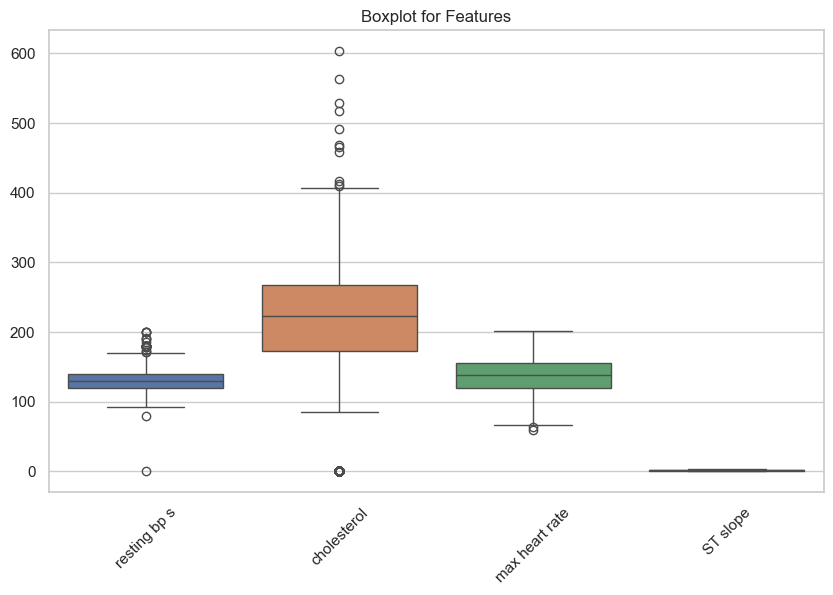

In [117]:
# Boxplot for detecting outliers in numerical features

features_to_plot = ['resting bp s', 'cholesterol', 'max heart rate', 'ST slope']   # Define the list of features to analyze

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[features_to_plot])
plt.title('Boxplot for Features')
plt.xticks(rotation=45)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4464\2396956686.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4464\2396956686.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4464\2396956686.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4464\2396956686.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same ef

ValueError: num must be an integer with 1 <= num <= 9, not 10

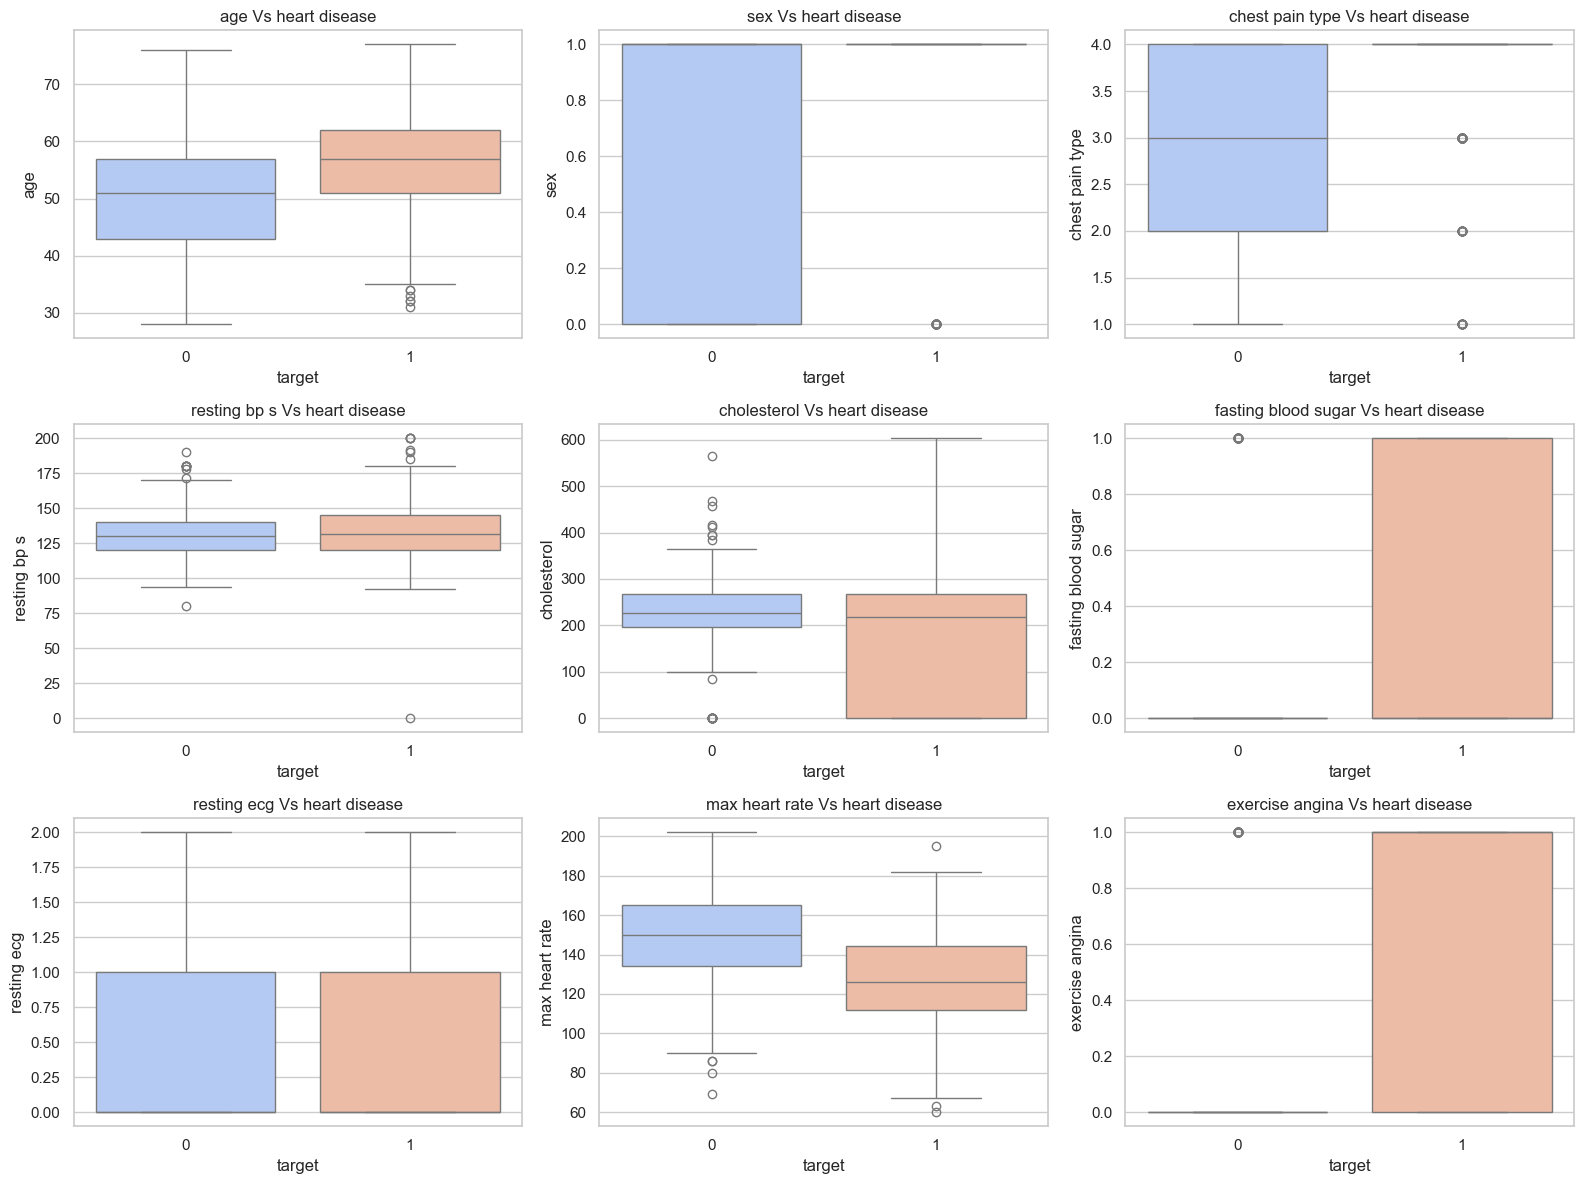

In [213]:
# Box plots to observe distribution of features with respect to Heart Disease 
plt.figure(figsize=(16, 12))
for idx, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, idx)
    sns.boxplot(x='target', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} Vs heart disease')
    plt.tight_layout()
plt.show()

In [ ]:
Boxplot Interpretation

- A few number of features have outliers that can distort models, which may be rare but valid in medical dataset as some patients may present with very high blood presure, 
  blood sugar or cholesterol (hyperlipidemia).

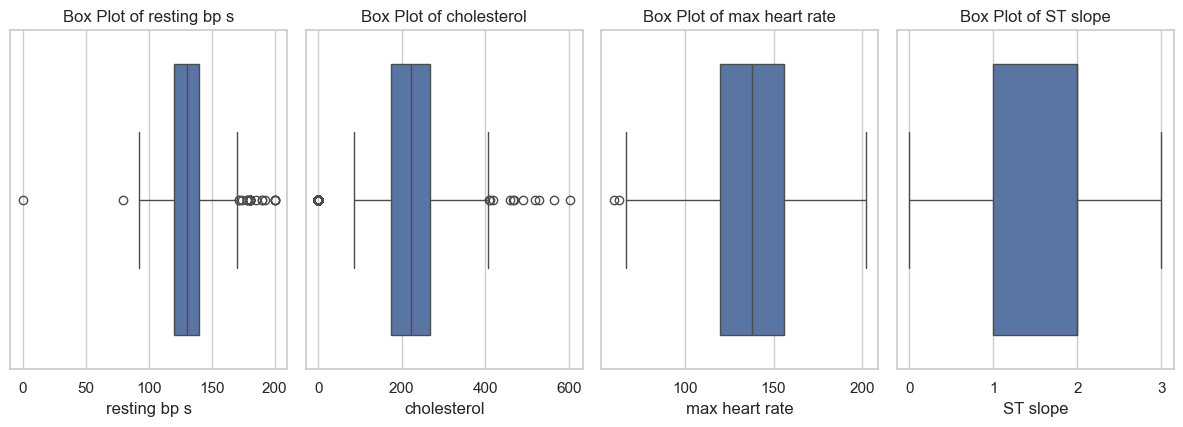

In [118]:
# Creating box plots for key features in the dataset (excluding the Target variable)
plt.figure(figsize=(12, 8))

columns = ['resting bp s', 'cholesterol', 'max heart rate', 'ST slope', ]   # List of columns to plot 
for i, col in enumerate(columns, 1):
    plt.subplot(2, 4, i)  # Adjust the layout (2 rows, 4 columns)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

plt.show()

In [ ]:
# Using Z-score to detect outliers in numerical features 

In [119]:
# Using Interquartile range (IQR) to detect outliers in numerical features 

columns = ['resting bp s', 'cholesterol', 'max heart rate', 'ST slope']
outlier_rows = pd.DataFrame()   # Container for outlier rows

for col in columns:   # Loop through each column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    is_outlier = (df[col] < lower_bound) | (df[col] > upper_bound)   # Find outliers
    print(f"{col} - Outliers detected: {is_outlier.sum()}")

resting bp s - Outliers detected: 28
cholesterol - Outliers detected: 183
max heart rate - Outliers detected: 2
ST slope - Outliers detected: 0


In [ ]:
# Heatmap - Correlation Matrix: This helps to identify any strong correlations between numerical features in the dataset

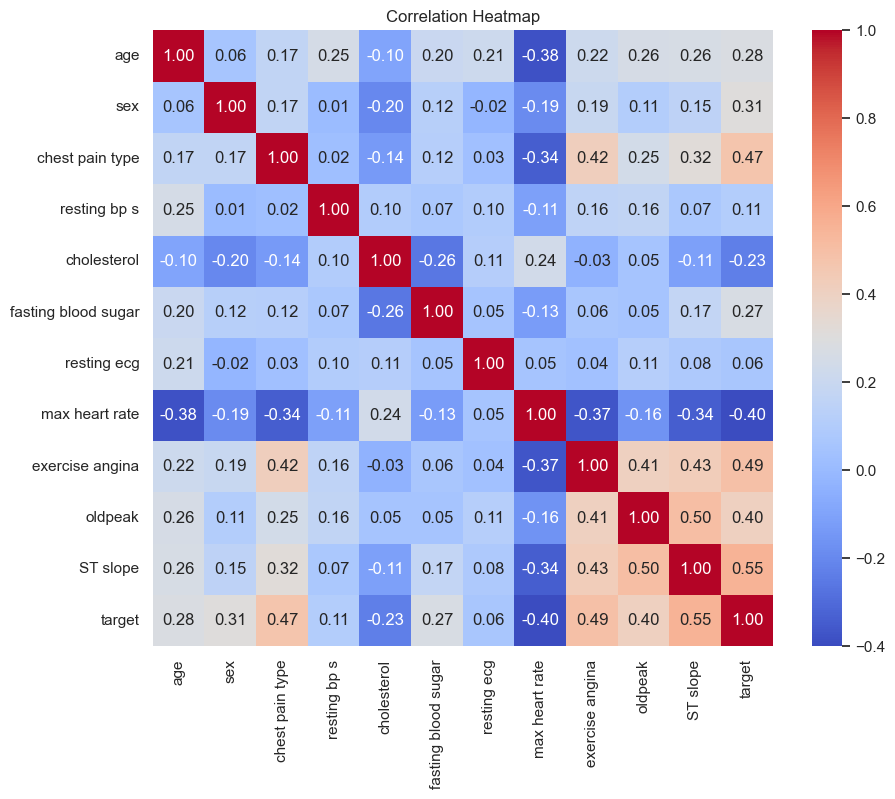

In [120]:
plt.figure(figsize=(10, 8))   # # Visualize it as a heatmap 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()   # Display the output

In [ ]:
 What the Heatmap Shows:
Values range from -1 to 1:

+1 = perfect positive correlation (both increase together)

0 = no correlation

-1 = perfect negative correlation (one increases while the other decreases)

The color bar on the right shows:

Redder shades = higher positive correlation

Bluer shades = lower or negative correlation

📌 Feature	Correlation with Target	Interpretation
- ST slope (0.55) vs Target (Heart disease)	
    This is the strongest positive correlation with the target variable. Changes in the ST segment during exercise (e.g., upsloping, flat, or downsloping) are highly predictive 
    of heart disease.

- Exercise Angina vs Target	(0.49)	
    Moderate positive correlation.  Angina- pain experienced during exercise tends to be associated with a higher likelihood of heart disease.

- Chest Pain Type vs Target	(0.47)	
    Moderate correlation; Certain chest pain types (e.g., typical angina) are more associated with heart disease.

- Old Peak vs Target (0.40)	
    Moderate correlation; This represents ST depression induced by exercise; higher values relate to greater risk.

- Gender vs Target (0.31)	
    Weak to moderate correlation; Being male is somewhat associated with a higher risk.

- Age vs Target	(0.28)	
    Weak correlation; Older age is slightly associated with increased risk.

- Fasting blood sugar vs Target (0.27)	
    Weak correlation; higher fasting glucose might relate to heart disease, but it’s a less reliable predictor on its own.
        
- Resting Blood Pressure vs target (0.11)	
    Very weak correlation; minimal relationship with the presence of heart disease in this dataset.


> Feature Pair	Correlation	Interpretation
- Chest Pain Type & Exercise Angina	(0.42)	
    Moderate positive correlation; Certain chest pain types are associated with the presence of angina during exercise.

🧠 Final Summary:
The top predictors remain: ST slope, exercise angina, chest pain type, and old peak.

Gender and age are modest contributors.

Fasting blood sugar has a weak relationship with heart disease in this data — it might play a supporting role in models, especially when combined 
with other metabolic indicators (e.g. diabetes).

Resting blood pressure shows very little correlation, which might seem counterintuitive, but it's common in datasets where hypertension is 
prevalent across both diseased and healthy groups, limiting its predictive value.


In [121]:
# Calculating Median for Data with Outliers (all columns)
median_values = df.select_dtypes(include='number').median()
print(median_values)

age                     54.0
sex                      1.0
chest pain type          4.0
resting bp s           130.0
cholesterol            223.0
fasting blood sugar      0.0
resting ecg              0.0
max heart rate         138.0
exercise angina          0.0
oldpeak                  0.6
ST slope                 2.0
target                   1.0
dtype: float64


In [94]:
# Feature Scaling: Is a technique used to bring all features in a dataset to the same range. Models like KNN,SVM and LOGISTIC REGRESSION perform 
 better when data is standardized.

In [122]:
# Feature Scaling with StandardScaler 
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)   # X is all the features , y is the target variable
y = df['target']

scaler = StandardScaler()   # Standardize features
X_scaled = scaler.fit_transform(X)

In [ ]:
# Feature Selection Technique: Is the process of picking the most important features in the dataset
 Just pick 3-4 features

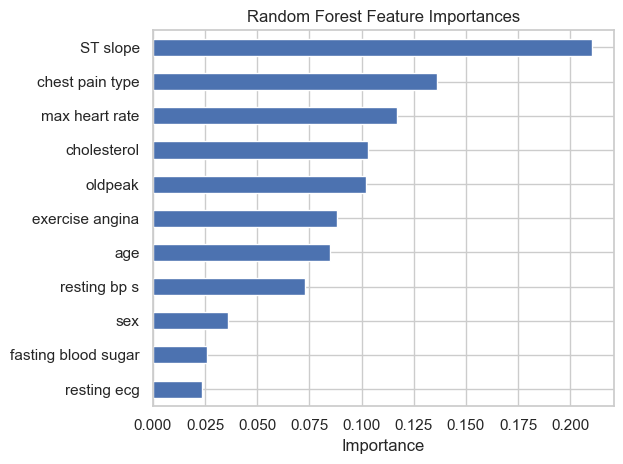

Top Features by Random Forest:
ST slope               0.210376
chest pain type        0.136110
max heart rate         0.117146
cholesterol            0.102950
oldpeak                0.101930
exercise angina        0.088179
age                    0.084695
resting bp s           0.073064
sex                    0.035911
fasting blood sugar    0.026057
resting ecg            0.023583
dtype: float64


In [123]:
# Feature Selection with Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_scaled, y)

importances = rf.feature_importances_   # Get feature importances
features = pd.Series(importances, index=X.columns)

features.sort_values(ascending=False).plot(kind='barh', title="Random Forest Feature Importances")   # Plot feature importances
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

print("Top Features by Random Forest:")   # Display feature importances
print(features.sort_values(ascending=False))

In [124]:
# Feature Selection with KBest
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=6)
X_kbest = selector.fit_transform(X_scaled, y)

selected_kbest = X.columns[selector.get_support()]
print("Selected Features (SelectKBest):", list(selected_kbest))

Selected Features (SelectKBest): ['sex', 'chest pain type', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope']


In [125]:
# Feature Selection with Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=6)
rfe.fit(X_scaled, y)
selected_rfe = X.columns[rfe.support_]
print("Selected Features (RFE):", list(selected_rfe))

Selected Features (RFE): ['sex', 'chest pain type', 'fasting blood sugar', 'exercise angina', 'oldpeak', 'ST slope']


In [126]:
# Using Forward Selection 
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression 

logreg = LogisticRegression(max_iter=1000)
sfs_forward = SequentialFeatureSelector(logreg, n_features_to_select=6, direction='forward')
sfs_forward.fit(X_scaled, y)

selected_forward = X.columns[sfs_forward.get_support()]
print("Selected Features (Forward Selection):", list(selected_forward))

Selected Features (Forward Selection): ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'oldpeak', 'ST slope']


In [127]:
# Using Backward Elimination
sfs_backward = SequentialFeatureSelector(logreg, n_features_to_select=6, direction='backward')
sfs_backward.fit(X_scaled, y)

selected_backward = X.columns[sfs_backward.get_support()]
print("Selected Features (Backward Elimination):", list(selected_backward))

Selected Features (Backward Elimination): ['sex', 'chest pain type', 'resting ecg', 'exercise angina', 'oldpeak', 'ST slope']


In [ ]:
# Data splitting: Is the process of dividing dataset into training and testing set. 
For this dataset, I am using 80% for training and 20% for testing. This helps to evaluate the performance of the model

In [128]:
from sklearn.model_selection import train_test_split

# X train, X test: they're the features
# y train, y test: the target variable  

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42,stratify=y)

In [141]:
# Confirm split sizes
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (734, 11)
Testing Set Shape: (184, 11)


In [142]:
# Check the shape of each split to understand the sizes

print("X_train shape:", X_train.shape)       # Features for training: 80% of rows
print("X_test shape:", X_test.shape)         # Features for testing: 20% of rows
print("y_train shape:", y_train.shape)       # Labels for trainig set 
print("y_test shape:", y_test.shape)         # Labels for test set

X_train shape: (734, 11)
X_test shape: (184, 11)
y_train shape: (734,)
y_test shape: (184,)


In [ ]:
 # Phase 3: Model Development 

In [143]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [144]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [145]:
# Predict on test set
y_pred = model.predict(X_test)   # Uses the trained Logistic Regression model to predict the output labels for your test features X_test.
y_proba = model.predict_proba(X_test)[:, 1]   # For binary classification ROC-AUC

In [146]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8858695652173914

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



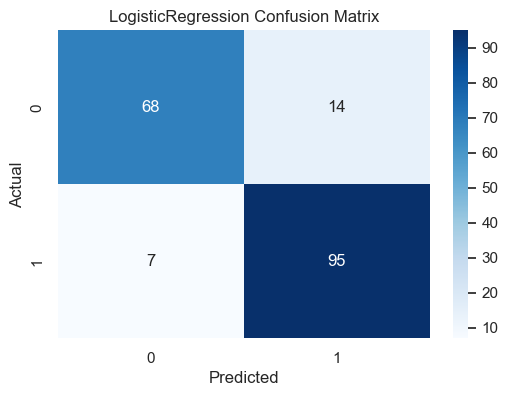

In [147]:
# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LogisticRegression Confusion Matrix')
plt.show()

In [148]:
# XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
# Hyperparameter Tuning is the process of selecting the best set of hyperparameters for a model to improve its performance.
# Manually tune model
model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    use_label_encoder='logloss',
    randm_state=42
)

In [150]:
# Train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

C:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[18:17:30] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [151]:
 # Predict on test set
xgb_pred = xgb_model.predict(X_test)   
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]   # For binary classification ROC-AUC

In [152]:
# After training the model, evaluate the performance
print("\n⚡ XGBoost")
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))    
print("\nXGBoost Report:\n", classification_report(y_test, xgb_pred))


⚡ XGBoost
XGBoost Accuracy: 0.8641304347826086

XGBoost Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85        82
           1       0.88      0.87      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



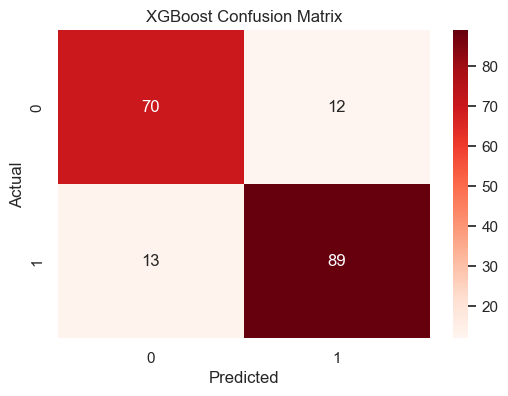

In [153]:
# Plot confusion matrix
conf_mat = confusion_matrix(y_test, xgb_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

In [154]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV

In [155]:
# Tune the model using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Define model
rf = RandomForestClassifier(random_state=42)

# Define GridSearch
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
)

# Fit
grid_search.fit(X_train, y_train)

# Best model
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Predict  
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate performance 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Best Accuracy: 0.8664336967663779
Accuracy: 0.8913043478260869

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87        82
           1       0.88      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



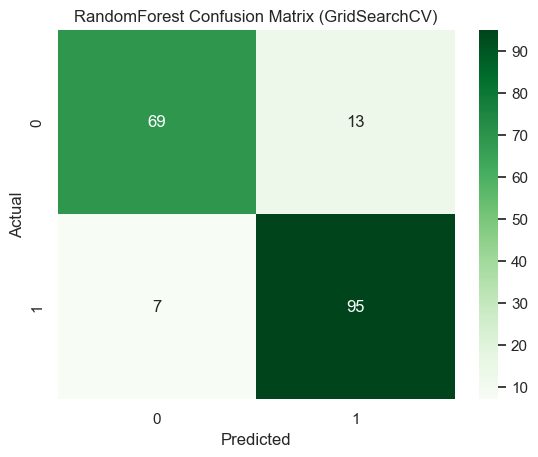

In [157]:
# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RandomForest Confusion Matrix (GridSearchCV)')
plt.show()

In [158]:
# Random Forest (Without Tuning)
from sklearn.ensemble import RandomForestClassifier 

In [159]:
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [160]:
# Predict on test set
y_pred = model.predict(X_test)   
y_proba = model.predict_proba(X_test)[:, 1]   # Only for binary classification ROC-AUC

In [161]:
# After training the model, evaluate the performance

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8858695652173914

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



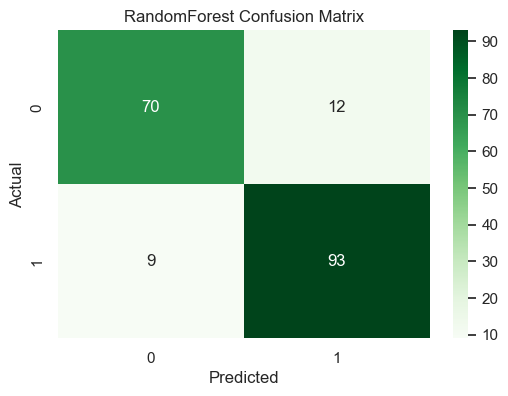

In [162]:
# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RandomForest Confusion Matrix')
plt.show()

In [163]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC

In [164]:
# Train the model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)  # kernel: 'linear', 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [165]:
# Predict on test set
y_pred = svm_model.predict(X_test)
y_proba = svm_model.predict_proba(X_test)[:, 1]  # For ROC AUC

In [166]:
# After training the model, evaluate the performance

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))   # Classification report

Accuracy: 0.8858695652173914

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86        82
           1       0.86      0.95      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.88       184



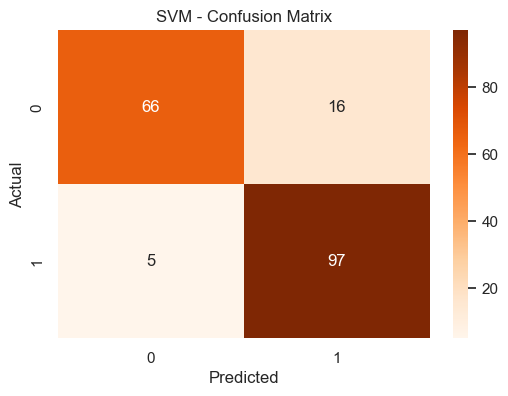

In [167]:
# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Oranges')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [168]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [169]:
# Train the model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [170]:
# Predict on test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

In [316]:
# After training the model, evaluate the performance

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8913043478260869
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87        82
           1       0.88      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



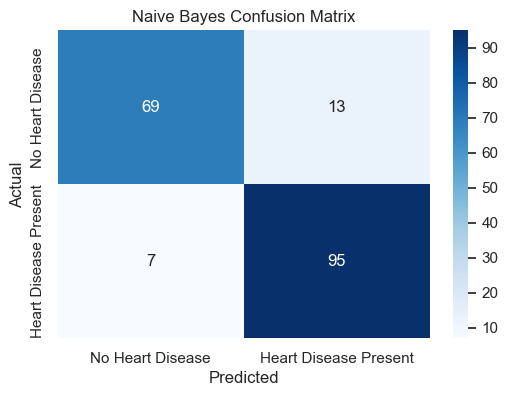

In [171]:
# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['No Heart Disease', 'Heart Disease Present'],
            yticklabels=['No Heart Disease', 'Heart Disease Present'])
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

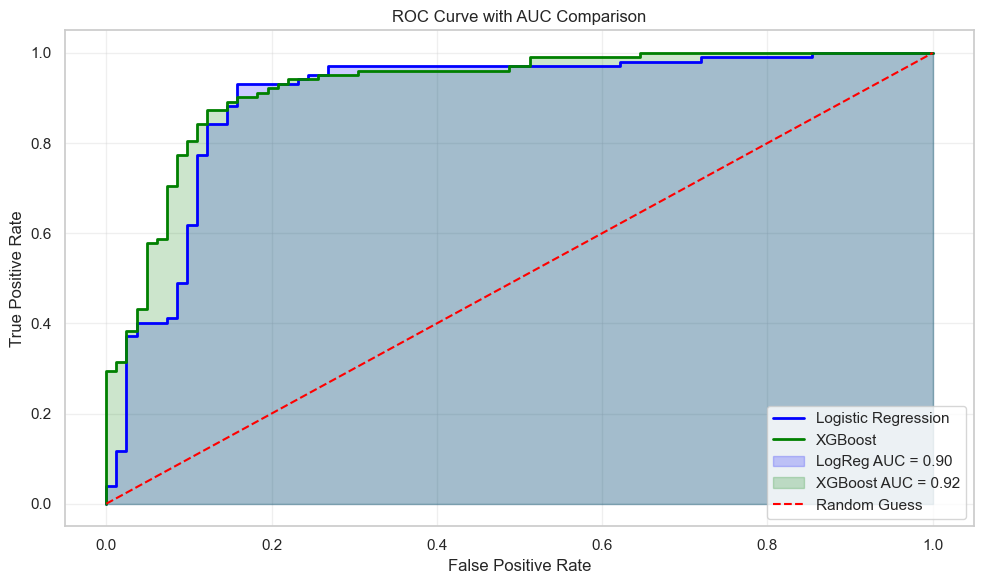

In [172]:
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC
fpr_log, tpr_log, _ = roc_curve(y_test, log_proba)   # For Logistic Regression
auc_log = auc(fpr_log, tpr_log)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)  # For XGBoost
auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(10, 6))

# Plot ROC curves
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label='Logistic Regression')
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label='XGBoost')

# Fill area under the curve (shading)
plt.fill_between(fpr_log, tpr_log, alpha=0.2, color='blue', label=f'LogReg AUC = {auc_log:.2f}')
plt.fill_between(fpr_xgb, tpr_xgb, alpha=0.2, color='green', label=f'XGBoost AUC = {auc_xgb:.2f}')

# Random guess line
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=1.5, label='Random Guess')

# Plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

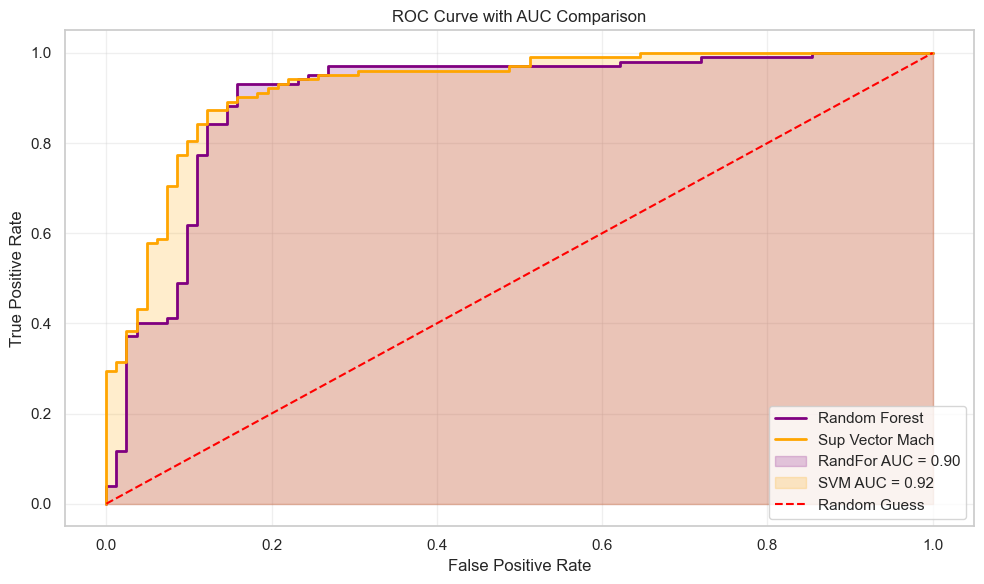

In [173]:
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC
fpr_randf, tpr_randf, _ = roc_curve(y_test, log_proba)   # For Random Forest
auc_randf = auc(fpr_randf, tpr_randf)

fpr_svm, tpr_svm, _ = roc_curve(y_test, xgb_proba)  # For Support Vector Machine
auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(10, 6))

# Plot ROC curves
plt.plot(fpr_randf, tpr_randf, color='purple', lw=2, label='Random Forest')
plt.plot(fpr_svm, tpr_svm, color='orange', lw=2, label='Sup Vector Mach')

# Fill area under the curve (shading)
plt.fill_between(fpr_randf, tpr_randf, alpha=0.2, color='purple', label=f'RandFor AUC = {auc_log:.2f}')
plt.fill_between(fpr_svm, tpr_svm, alpha=0.2, color='orange', label=f'SVM AUC = {auc_xgb:.2f}')

# Random guess line
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=1.5, label='Random Guess')

# Plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

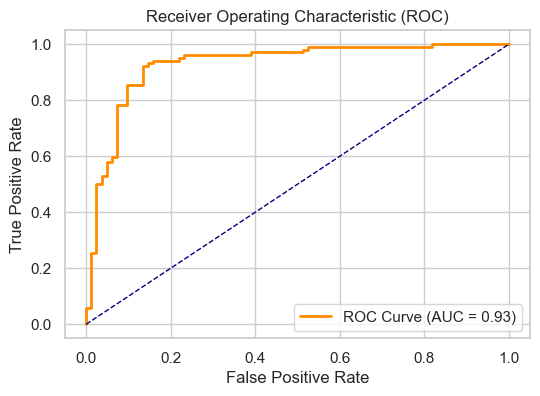

In [318]:
# Naive Bayes ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
✅ Summary of Evaluation Metrics
Model	Accuracy	Precision (1)	Recall (1)	F1-score (1)	Notes
LogReg.	0.89	0.87	0.93	0.90	Very good recall
RanFor	0.89	0.88	0.93	0.90	Slightly better precision
NBayes	0.89	0.88	0.93	0.90	Matches Random Forest
SVMachi	0.89	0.86	0.95	0.90	Best recall
XGBoost	0.86	0.88	0.87	0.88	Slightly lower overall

🧠 Interpretation:
All models except XGBoost achieved 0.89 accuracy.

SVM has the highest recall (0.95) for class 1, meaning it catches more true positives (important in healthcare).

Random Forest, Naive Bayes, and Logistic Regression all share the same F1-score for class 1 (0.90), but:

Random Forest has slightly better balance between precision and recall.

Naive Bayes surprisingly matches Random Forest.

XGBoost, despite being powerful, underperforms here compared to others.
    

✅ Final Recommendation:
📌 Choose Random Forest
It offers:

High precision and recall (well-balanced).

Consistently strong F1-score across both classes.

Good interpretability (via feature importance).

Excellent performance without the complexity of SVM tuning.

✅ Best overall model based on your results: Random Forest
🛑 Least favorable: XGBoost

In [ ]:
📊 Random Forest Model Evaluation

📌 1. Accuracy
Definition: Proportion of total correct predictions out of all predictions: 0.89 (or 89%)

Interpretation: The model correctly classified 89% of all patients.
    

📌 2. Precision
Definition: Out of all patients predicted to have the condition (positive class = 1), how many actually have it?

Formula: Precision = TP / (TP + FP)

Class 1 (Disease): 0.88

Interpretation: When the model predicts a patient has the condition, it is correct 88% of the time.
    

📌 3. Recall (Sensitivity)
Definition: Out of all actual positive cases, how many were correctly predicted?

Formula: Recall = TP / (TP + FN)

Class 1 (Disease): 0.93

Interpretation: The model correctly identifies 93% of patients who actually have the condition — this is important in medical diagnosis to reduce 
missed cases.
    

📌 4. F1-Score
Definition: Harmonic mean of precision and recall — balances both metrics.

Formula: F1 = 2 * (Precision * Recall) / (Precision + Recall)

Class 1 (Disease): 0.90

Interpretation: A strong balance between precision and recall — ideal for imbalanced datasets or where both false positives and false negatives matter.
    

📌 5. Support
Definition: Number of actual samples for each class in the test set.

Class 0 (No disease): 82

Class 1 (Disease): 102


📌 6. Class 0 (No Disease)
Precision	0.91
Recall	0.84
F1-score	0.87


✅ Overall Conclusion
Your Random Forest model is:

Highly accurate

Very good at identifying patients with disease (high recall)

Balanced and reliable in predictions (high F1-score)

Well-suited for medical applications where it's critical to catch most positive cases without too many false alarms

In [ ]:
🔢 Confusion Matrix Breakdown:
Predicted: Yes (Positive)	Predicted: No (Negative)
Actual: Yes	True Positive (TP) = 93	False Negative (FN) = 9
Actual: No	False Positive (FP) = 12	True Negative (TN) = 70

✅ What These Mean:
True Positive (TP = 93): The model correctly predicted heart disease (actual = yes, predicted = yes).

False Negative (FN = 9): The model missed 9 people who do have heart disease (actual = yes, predicted = no).

False Positive (FP = 12): The model incorrectly predicted heart disease in 12 people who don’t have it (actual = no, predicted = yes).

True Negative (TN = 70): The model correctly predicted no heart disease (actual = no, predicted = no).

📊 Performance Metrics:
Let’s calculate common evaluation metrics:

1. Accuracy
How many total predictions were correct? 

Accuracy =  (TP+TN) / (TP+TN+FP+FN)

            95 + 69 / 95 + 69 + 13 + 7

                164/184

                 ≈89.1%


2. Precision (Positive Predictive Value)
When the model predicts heart disease, how often is it right?

Precision = TP / TP + FP

            95 / 95 + 13

            95 / 108

             ≈88.0%


3. Recall (Sensitivity / True Positive Rate)
Out of all actual heart disease cases, how many did the model catch?

Recall = TP / TP + FN

            95 / 95 + 7

            95 / 102

             ≈93.1%


4. Specificity (True Negative Rate)
Out of all actual non-heart disease cases, how many were correctly identified?

Specificity = TN / TN + FP

                69 / 69 + 13

                69 / 82

                 ≈84.1%


5. F1 Score
Harmonic mean of precision and recall — balances false positives and false negatives.

F1 = 2. Precison . Recall / Precision + Recall

                2  . 0.88.0.931 / 0.88 + 0.931

                             ≈90.4%



🧠 Interpretation Summary:
✅ High recall (93.1%): Your model is doing an excellent job catching most heart disease cases.

✅ Strong precision (88.0%): It’s usually right when it predicts someone has heart disease.

✅ Good balance (F1 = 90.4%): A well-performing model in both sensitivity and precision.

⚠️ 13 false positives: Slightly more people are being flagged as having heart disease when they don't — acceptable in screening, but could be 
fine-tuned if specificity is a concern.

In [190]:
import joblib

joblib.dump(best_model, 'random_forest_heartdisease_model.pkl')

['random_forest_heartdisease_model.pkl']

In [191]:
import joblib
model = joblib.load('random_forest_heartdisease_model.pkl')   # Reload the model

In [186]:
print (model)

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=200,
                       random_state=42)
